In [ ]:
pip install tensorflow opencv-python scikit-learn numpy

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install kaggle


In [ ]:
from google.colab import files

In [ ]:
# Upload your Kaggle API token JSON file
uploaded = files.upload()

Saving kaggle_read.ipynb to kaggle_read.ipynb


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download shyambhu/hands-and-palm-images-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip -qq "/content/hands-and-palm-images-dataset.zip"

unzip:  cannot find or open /content/hands-and-palm-images-dataset.zip, /content/hands-and-palm-images-dataset.zip.zip or /content/hands-and-palm-images-dataset.zip.ZIP.


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
  import tensorflow as tf
  from tensorflow.keras import layers, models
  from sklearn.model_selection import train_test_split
  import numpy as np
  import cv2
  import os

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset and CSV file
data = pd.read_csv(r"/content/drive/MyDrive/Hands/HandInfo.csv")

# Data preprocessing
image_dir = r"/content/drive/MyDrive/Hands/Hands"


In [ ]:
print(data.head())

   id  age gender skinColor  accessories  nailPolish  aspectOfHand  \
0   0   27   male      fair            0           0  dorsal right   
1   0   27   male      fair            0           0  dorsal right   
2   0   27   male      fair            0           0  dorsal right   
3   0   27   male      fair            0           0  dorsal right   
4   0   27   male      fair            0           0  dorsal right   

          imageName  irregularities  
0  Hand_0000002.jpg               0  
1  Hand_0000003.jpg               0  
2  Hand_0000004.jpg               0  
3  Hand_0000005.jpg               0  
4  Hand_0000006.jpg               0  


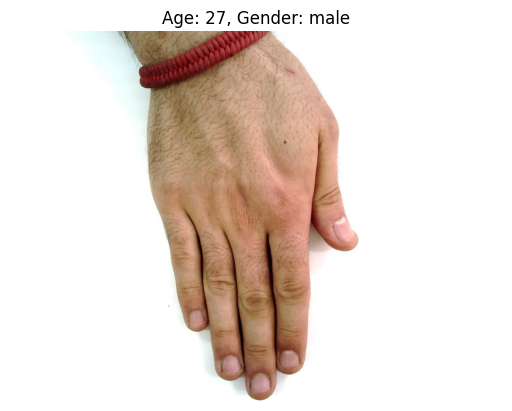

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming 'data' contains your dataset and 'image_dir' is the directory of your images

# Select a random index
random_index = random.randint(0, len(data) - 1)

# Get the image file name and label
image_name = data.loc[random_index, 'imageName']
age_label = data.loc[random_index, 'age']
gender_label = data.loc[random_index, 'gender']

# Load and display the image
image_path = os.path.join(image_dir, image_name)
image = plt.imread(image_path)

plt.imshow(image)
plt.title(f'Age: {age_label}, Gender: {gender_label}')
plt.axis('off')
plt.show()


In [ ]:
pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)



<ipython-input-69-0935c7b112a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Training Data:
      gender         imageName  gender_encoded
0     female  Hand_0008394.jpg               0
1     female  Hand_0000132.jpg               0
2       male  Hand_0000008.jpg               1
3       male  Hand_0007332.jpg               1
4       male  Hand_0004007.jpg               1
...      ...               ...             ...
1995  female  Hand_0006278.jpg               0
1996  female  Hand_0008479.jpg               0
1997  female  Hand_0008314.jpg               0
1998  female  Hand_0009450.jpg               0
1999    male  Hand_0006558.jpg               1

[2000 rows x 3 columns]

Testing Data:
     gender         imageName  gender_encoded
0      male  Hand_0011473.jpg               1
1    female  Hand_0009897.jpg               0
2      male  Hand_0008210.jpg               1
3    female  Hand_0001187.jpg               0
4    female  Hand_0002302.jpg               0
..      ...               ...             ...
995    male  Hand_0009825.jpg               1
996  female  

In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Modeld.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Modeld.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_40 (Dense)            (None, 128)               163968    
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)               

In [ ]:
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

Epoch 1/15
63/63 [==============================] - 15s 236ms/step - loss: 0.0556 - accuracy: 0.9795
Epoch 2/15
63/63 [==============================] - 16s 249ms/step - loss: 0.0618 - accuracy: 0.9755
Epoch 3/15
63/63 [==============================] - 16s 254ms/step - loss: 0.0497 - accuracy: 0.9820
Epoch 4/15
63/63 [==============================] - 16s 246ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 5/15
63/63 [==============================] - 16s 261ms/step - loss: 0.0530 - accuracy: 0.9810
Epoch 6/15
63/63 [==============================] - 17s 266ms/step - loss: 0.0551 - accuracy: 0.9805
Epoch 7/15
63/63 [==============================] - 16s 246ms/step - loss: 0.0422 - accuracy: 0.9845
Epoch 8/15
63/63 [==============================] - 15s 245ms/step - loss: 0.0421 - accuracy: 0.9810
Epoch 9/15
63/63 [==============================] - 16s 251ms/step - loss: 0.0452 - accuracy: 0.9820
Epoch 10/15
63/63 [==============================] - 16s 250ms/step - loss: 0.0518 - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Function to create an EfficientNet model for gender prediction without SE block
def create_gender_model(input_shape=(256, 256, 3)):
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

# Create the gender model without the SE block
gender_model = create_gender_model()

# Compile and display the model summary
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gender_model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 16, 16, 1280)      4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dense_68 (Dense)            (None, 128)               163968    
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 16

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (512, 512)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)



Training Data:
      gender         imageName  gender_encoded
0     female  Hand_0008394.jpg               0
1     female  Hand_0000132.jpg               0
2       male  Hand_0000008.jpg               1
3       male  Hand_0007332.jpg               1
4       male  Hand_0004007.jpg               1
...      ...               ...             ...
1995  female  Hand_0006278.jpg               0
1996  female  Hand_0008479.jpg               0
1997  female  Hand_0008314.jpg               0
1998  female  Hand_0009450.jpg               0
1999    male  Hand_0006558.jpg               1

[2000 rows x 3 columns]

Testing Data:
     gender         imageName  gender_encoded
0      male  Hand_0011473.jpg               1
1    female  Hand_0009897.jpg               0
2      male  Hand_0008210.jpg               1
3    female  Hand_0001187.jpg               0
4    female  Hand_0002302.jpg               0
..      ...               ...             ...
995    male  Hand_0009825.jpg               1
996  female  

<ipython-input-94-1422cd51429e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/15
63/63 [==============================] - 38s 484ms/step - loss: 0.4807 - accuracy: 0.7645
Epoch 2/15
63/63 [==============================] - 32s 498ms/step - loss: 0.2769 - accuracy: 0.8960
Epoch 3/15
63/63 [==============================] - 31s 488ms/step - loss: 0.2016 - accuracy: 0.9285
Epoch 4/15
63/63 [==============================] - 30s 479ms/step - loss: 0.1761 - accuracy: 0.9320
Epoch 5/15
63/63 [==============================] - 32s 503ms/step - loss: 0.1555 - accuracy: 0.9435
Epoch 6/15
63/63 [==============================] - 33s 524ms/step - loss: 0.1303 - accuracy: 0.9560
Epoch 7/15
63/63 [==============================] - 31s 490ms/step - loss: 0.1175 - accuracy: 0.9610
Epoch 8/15
63/63 [==============================] - 31s 487ms/step - loss: 0.1029 - accuracy: 0.9640
Epoch 9/15
63/63 [==============================] - 32s 496ms/step - loss: 0.1270 - accuracy: 0.9500
Epoch 10/15
63/63 [==============================] - 32s 500ms/step - loss: 0.0777 - accura

In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Model2.h5")
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Model2.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
 7 (GlobalAveragePooling2D)                                      
                                                                 
 dense_65 (Dense)            (None, 128)               262272    
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                     

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to create a MobileNetV2 model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

# Create the gender model with MobileNetV2
gender_model = create_gender_model()

# Compile and display the model summary
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gender_model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_69 (Dense)            (None, 128)               163968    
                                                                 
 dense_70 (Dense)            (None, 128)               16512     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                        

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Training Data:
      gender         imageName  gender_encoded
0     female  Hand_0008394.jpg               0
1     female  Hand_0000132.jpg               0
2       male  Hand_0000008.jpg               1
3       male  Hand_0007332.jpg               1
4       male  Hand_0004007.jpg               1
...      ...               ...             ...
1995  female  Hand_0006278.jpg               0
1996  female  Hand_0008479.jpg               0
1997  female  Hand_0008314.jpg               0
1998  female  Hand_0009450.jpg               0
1999    male  Hand_0006558.jpg               1

[2000 rows x 3 columns]

Testing Data:
     gender         imageName  gender_encoded
0      male  Hand_0011473.jpg               1
1    female  Hand_0009897.jpg               0
2      male  Hand_0008210.jpg               1
3    female  Hand_0001187.jpg               0
4    female  Hand_0002302.jpg               0
..      ...               ...             ...
995    male  Hand_0009825.jpg               1
996  female  

<ipython-input-96-30671a3e450b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/15
63/63 [==============================] - 19s 241ms/step - loss: 0.4836 - accuracy: 0.7555
Epoch 2/15
63/63 [==============================] - 16s 249ms/step - loss: 0.2166 - accuracy: 0.9175
Epoch 3/15
63/63 [==============================] - 15s 240ms/step - loss: 0.1407 - accuracy: 0.9500
Epoch 4/15
63/63 [==============================] - 16s 247ms/step - loss: 0.1083 - accuracy: 0.9575
Epoch 5/15
63/63 [==============================] - 14s 227ms/step - loss: 0.0559 - accuracy: 0.9785
Epoch 6/15
63/63 [==============================] - 17s 266ms/step - loss: 0.0404 - accuracy: 0.9865
Epoch 7/15
63/63 [==============================] - 17s 273ms/step - loss: 0.0258 - accuracy: 0.9955
Epoch 8/15
63/63 [==============================] - 14s 229ms/step - loss: 0.0234 - accuracy: 0.9950
Epoch 9/15
63/63 [==============================] - 16s 248ms/step - loss: 0.0350 - accuracy: 0.9870
Epoch 10/15
63/63 [==============================] - 15s 243ms/step - loss: 0.0147 - accura

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Function to create a MobileNetV2 model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='sigmoid'),
        layers.Dropout(0.5),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

# Create the gender model with MobileNetV2
gender_model = create_gender_model()

# Compile and display the model summary
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gender_model.summary()

import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_45 (Dropout)        (None, 1280)              0         
                                                                 
 dense_75 (Dense)            (None, 128)               163968    
                                                                 
 dense_76 (Dense)            (None, 128)               16512     
                                                                 
 dropout_46 (Dropout)        (None, 128)             

<ipython-input-100-88e99b6f2feb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/15
63/63 [==============================] - 19s 241ms/step - loss: 0.6431 - accuracy: 0.6410
Epoch 2/15
63/63 [==============================] - 15s 241ms/step - loss: 0.3914 - accuracy: 0.8250
Epoch 3/15
63/63 [==============================] - 15s 229ms/step - loss: 0.2913 - accuracy: 0.8780
Epoch 4/15
63/63 [==============================] - 16s 248ms/step - loss: 0.2677 - accuracy: 0.8825
Epoch 5/15
63/63 [==============================] - 16s 255ms/step - loss: 0.2523 - accuracy: 0.9000
Epoch 6/15
63/63 [==============================] - 16s 251ms/step - loss: 0.2404 - accuracy: 0.8940
Epoch 7/15
63/63 [==============================] - 16s 248ms/step - loss: 0.2027 - accuracy: 0.9185
Epoch 8/15
63/63 [==============================] - 16s 259ms/step - loss: 0.2117 - accuracy: 0.9175
Epoch 9/15
63/63 [==============================] - 16s 248ms/step - loss: 0.1924 - accuracy: 0.9210
Epoch 10/15
63/63 [==============================] - 16s 249ms/step - loss: 0.2074 - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_77 (Dense)            (None, 128)               163968    
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 16

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

Training Data:
      gender         imageName  gender_encoded
0     female  Hand_0008394.jpg               0
1     female  Hand_0000132.jpg               0
2       male  Hand_0000008.jpg               1
3       male  Hand_0007332.jpg               1
4       male  Hand_0004007.jpg               1
...      ...               ...             ...
1995  female  Hand_0006278.jpg               0
1996  female  Hand_0008479.jpg               0
1997  female  Hand_0008314.jpg               0
1998  female  Hand_0009450.jpg               0
1999    male  Hand_0006558.jpg               1

[2000 rows x 3 columns]

Testing Data:
     gender         imageName  gender_encoded
0      male  Hand_0011473.jpg               1
1    female  Hand_0009897.jpg               0
2      male  Hand_0008210.jpg               1
3    female  Hand_0001187.jpg               0
4    female  Hand_0002302.jpg               0
..      ...               ...             ...
995    male  Hand_0009825.jpg               1
996  female  

<ipython-input-102-30671a3e450b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/15
63/63 [==============================] - 20s 234ms/step - loss: 0.4767 - accuracy: 0.7605
Epoch 2/15
63/63 [==============================] - 16s 247ms/step - loss: 0.3215 - accuracy: 0.8675
Epoch 3/15
63/63 [==============================] - 16s 253ms/step - loss: 0.2482 - accuracy: 0.9050
Epoch 4/15
63/63 [==============================] - 17s 266ms/step - loss: 0.2105 - accuracy: 0.9215
Epoch 5/15
63/63 [==============================] - 15s 238ms/step - loss: 0.1868 - accuracy: 0.9275
Epoch 6/15
63/63 [==============================] - 16s 255ms/step - loss: 0.1708 - accuracy: 0.9385
Epoch 7/15
63/63 [==============================] - 15s 236ms/step - loss: 0.1556 - accuracy: 0.9395
Epoch 8/15
63/63 [==============================] - 15s 242ms/step - loss: 0.1454 - accuracy: 0.9455
Epoch 9/15
63/63 [==============================] - 15s 237ms/step - loss: 0.1322 - accuracy: 0.9470
Epoch 10/15
63/63 [==============================] - 16s 248ms/step - loss: 0.1263 - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.Dropout(0.5),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 dropout_49 (Dropout)        (None, 7, 7, 1280)        0         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_78 (Dense)            (None, 128)               163968    
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)               

<ipython-input-103-261e896e5eb1>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/15
63/63 [==============================] - 23s 233ms/step - loss: 0.4885 - accuracy: 0.7560
Epoch 2/15
63/63 [==============================] - 15s 232ms/step - loss: 0.3369 - accuracy: 0.8490
Epoch 3/15
63/63 [==============================] - 16s 260ms/step - loss: 0.2785 - accuracy: 0.8865
Epoch 4/15
63/63 [==============================] - 16s 254ms/step - loss: 0.2543 - accuracy: 0.8980
Epoch 5/15
63/63 [==============================] - 15s 240ms/step - loss: 0.2147 - accuracy: 0.9155
Epoch 6/15
63/63 [==============================] - 17s 264ms/step - loss: 0.1998 - accuracy: 0.9225
Epoch 7/15
63/63 [==============================] - 16s 247ms/step - loss: 0.1816 - accuracy: 0.9315
Epoch 8/15
63/63 [==============================] - 15s 243ms/step - loss: 0.1672 - accuracy: 0.9370
Epoch 9/15
63/63 [==============================] - 16s 246ms/step - loss: 0.1727 - accuracy: 0.9305
Epoch 10/15
63/63 [==============================] - 15s 234ms/step - loss: 0.1705 - accura

In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Model3.h5")
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Model3.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 dropout_49 (Dropout)        (None, 7, 7, 1280)        0         
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_78 (Dense)            (None, 128)               163968    
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)               

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(380, 380, 3)):  # EfficientNetB4 default input size
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Fine-tune the last few layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Adding dropout for regularization
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

# Using a lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

gender_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (380, 380)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


71892840/71892840 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 12, 12, 1792)      17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_2  (None, 1792)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               459008    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 257       
                                                       

NameError: ignored

In [ ]:
pip install tensorflow efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):  # EfficientNetB4 default input size
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Fine-tune the last few layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Adding dropout for regularization
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

# Using a lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

gender_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


import pandas as pd
from sklearn.model_selection import train_test_split



# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)
# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Display a few rows of the training and testing datasets
print("Training Data:")
print(train_data)

print("\nTesting Data:")
print(test_data)


# print(image_dir)
print(image_size)



train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)


test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None # Add this line to ensure RGB color mode
)

gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 7, 7, 1792)        17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_6  (None, 1792)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               459008    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 257       
                                                                 
Total params: 18133081 (69.17 MB)
Trainable params: 18

<ipython-input-11-4203d29f2380>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Found 2000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Epoch 1/15
63/63 [==============================] - 488s 6s/step - loss: 0.3865 - accuracy: 0.8325
Epoch 2/15
63/63 [==============================] - 39s 613ms/step - loss: 0.0579 - accuracy: 0.9830
Epoch 3/15
63/63 [==============================] - 39s 623ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 4/15
63/63 [==============================] - 40s 631ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 5/15
63/63 [==============================] - 40s 631ms/step - loss: 0.0115 - accuracy: 0.9955
Epoch 6/15
63/63 [==============================] - 40s 629ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 7/15
63/63 [==============================] - 40s 629ms/step - loss: 0.0100 - accuracy: 0.9965
Epoch 8/15
63/63 [==============================] - 40s 628ms/step - loss: 0.0058 - accuracy: 0.9985
Epoch 9/15
63/63 [==============================] - 40s 628ms/step - los

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB5  # Change to EfficientNetB5

# Function to create an EfficientNetB5 model for gender prediction
def create_gender_model(input_shape=(112, 112, 3)):  # Update input shape for EfficientNetB5
    base_model = EfficientNetB5(input_shape=input_shape, include_top=False, weights='imagenet')  # Change to EfficientNetB5

    # Fine-tune the last few layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')
    ])

    return model

gender_model_b5 = create_gender_model()  # Rename the model to avoid conflicts

# Using a lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

gender_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Drop rows where 'accessories' is True
# data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
# label_encoder = LabelEncoder()
# data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)

# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

# train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
# test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Display a few rows of the training and validation datasets
print("Training Data:")
print(train_data)

print("\nValidation Data:")
print(val_data)


train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

val_datagen_dorsal = datagen.flow_from_dataframe(
    val_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

# Continue with the rest of your code, including model training and evaluation
gender_model.fit(train_datagen_dorsal, epochs=15, validation_data=val_datagen_dorsal)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 7, 7, 1792)        17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_6  (None, 1792)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               459008    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 257       
                                                                 
Total params: 18133081 (69.17 MB)
Trainable params: 18

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB5  # Change to EfficientNetB5

# Function to create an EfficientNetB5 model with SE block for gender prediction
def create_gender_model_with_se(input_shape=(112, 112, 3)):  # Update input shape for EfficientNetB5
    base_model = EfficientNetB5(input_shape=input_shape, include_top=False, weights='imagenet')  # Change to EfficientNetB5

    # Fine-tune the last few layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add Squeeze-and-Excitation block
    se = layers.GlobalAveragePooling2D()(base_model.output)
    se = layers.Reshape((1, 1, -1))(se)
    se = layers.Conv2D(int(base_model.output_shape[-1] * 0.25), (1, 1), activation='relu', kernel_initializer='he_normal', strides=(1, 1), padding='same')(se)
    se = layers.Conv2D(int(base_model.output_shape[-1]), (1, 1), activation='sigmoid', kernel_initializer='he_normal', strides=(1, 1), padding='same')(se)
    se = layers.multiply([base_model.output, se])

    x = layers.GlobalAveragePooling2D()(se)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(1, activation='sigmoid', name='gender_encoded')(x)

    model = tf.keras.Model(inputs=base_model.input, outputs=output)

    return model

gender_model_b5_se = create_gender_model_with_se()  # Rename the model to avoid conflicts

# Using a lower learning rate for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

gender_model_b5_se.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

gender_model_b5_se.summary()



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Drop rows where 'accessories' is True
# data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
# label_encoder = LabelEncoder()
# data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
datagen = ImageDataGenerator(rescale=1./255)
image_size = (224, 224)

# Read labels and image names for training
train_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_training_d.txt", header=None, names=['gender'])
train_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_training_d.txt", header=None, names=['imageName'])
train_data = pd.concat([train_labels, train_image_names], axis=1)

# Read labels and image names for testing
test_labels = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_testing_d.txt", header=None, names=['gender'])
test_image_names = pd.read_csv(r"/content/drive/MyDrive/Experiment/5-20231220T111309Z-001/5/g_imgs_testing_d.txt", header=None, names=['imageName'])
test_data = pd.concat([test_labels, test_image_names], axis=1)

# train_data['gender_encoded'] = label_encoder.fit_transform(train_data['gender'])
# test_data['gender_encoded'] = label_encoder.transform(test_data['gender'])

# Split the training data into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Display a few rows of the training and validation datasets
print("Training Data:")
print(train_data)

print("\nValidation Data:")
print(val_data)


train_datagen_dorsal = datagen.flow_from_dataframe(
    train_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

val_datagen_dorsal = datagen.flow_from_dataframe(
    val_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

test_datagen_dorsal = datagen.flow_from_dataframe(
    test_data,
    directory=image_dir,
    x_col='imageName',
    y_col='gender',
    target_size=image_size,
    class_mode="binary",
    batch_size=32,
    subset=None  # Add this line to ensure RGB color mode
)

# Continue with the rest of your code, including model training and evaluation
gender_model.fit(train_datagen_dorsal, epochs=15, validation_data=val_datagen_dorsal)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 112, 112, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 56, 56, 48)           1296      ['input_22[0][0]']            
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 56, 56, 48)           192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 56, 56, 48)           0         ['stem_bn[0][0]']         

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dense_17 (Dense)            (None, 128)               163968    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 16

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=15)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)




<ipython-input-26-a5d36370f986>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Found 2000 validated image filenames.
Found 1000 validated image filenames.
Epoch 1/15
63/63 [==============================] - 24s 285ms/step - loss: 0.4727 - accuracy: 0.7705
Epoch 2/15
63/63 [==============================] - 17s 277ms/step - loss: 0.3056 - accuracy: 0.8730
Epoch 3/15
63/63 [==============================] - 18s 284ms/step - loss: 0.2526 - accuracy: 0.8950
Epoch 4/15
63/63 [==============================] - 19s 305ms/step - loss: 0.2236 - accuracy: 0.9115
Epoch 5/15
63/63 [==============================] - 18s 279ms/step - loss: 0.1907 - accuracy: 0.9275
Epoch 6/15
63/63 [==============================] - 18s 285ms/step - loss: 0.1790 - accuracy: 0.9305
Epoch 7/15
63/63 [==============================] - 18s 284ms/step - loss: 0.1631 - accuracy: 0.9375
Epoch 8/15
63/63 [==============================] - 18s 288ms/step - loss: 0.1464 - accuracy: 0.9515
Epoch 9/15
63/63 [==============================] - 18s 280ms/step - loss: 0.1358 - accuracy: 0.9490
Epoch 10/15
63/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Model4.h5")
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Model4.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dense_17 (Dense)            (None, 128)               163968    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 16

In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Model4.h5")
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Model4.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dense_17 (Dense)            (None, 128)               163968    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Function to create an EfficientNetB4 model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 7, 7, 1792)        17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_2  (None, 1792)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_18 (Dense)            (None, 128)               229504    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 17903449 (68.30 MB)
Trainable params: 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=15)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)




<ipython-input-30-34d1c1342864>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Found 2000 validated image filenames.
Found 1000 validated image filenames.
Epoch 1/15
63/63 [==============================] - 31s 294ms/step - loss: 0.4483 - accuracy: 0.7825
Epoch 2/15
63/63 [==============================] - 18s 287ms/step - loss: 0.3436 - accuracy: 0.8500
Epoch 3/15
63/63 [==============================] - 19s 296ms/step - loss: 0.3030 - accuracy: 0.8770
Epoch 4/15
63/63 [==============================] - 20s 322ms/step - loss: 0.2887 - accuracy: 0.8725
Epoch 5/15
63/63 [==============================] - 18s 281ms/step - loss: 0.2672 - accuracy: 0.8810
Epoch 6/15
63/63 [==============================] - 20s 324ms/step - loss: 0.2619 - accuracy: 0.8920
Epoch 7/15
63/63 [==============================] - 19s 306ms/step - loss: 0.2418 - accuracy: 0.9035
Epoch 8/15
63/63 [==============================] - 19s 294ms/step - loss: 0.2281 - accuracy: 0.9020
Epoch 9/15
63/63 [==============================] - 19s 298ms/step - loss: 0.2252 - accuracy: 0.9045
Epoch 10/15
63/

In [ ]:
gender_model.save("/content/drive/MyDrive/Colab Notebooks/Model9.h5")
from tensorflow.keras.models import load_model

# Replace 'path/to/your/model.h5' with the actual path to your model file
model_path = r"/content/drive/MyDrive/Colab Notebooks/Model9.h5"

# Load the model
loaded_model = load_model(model_path)
loaded_model.summary()
gender_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results = gender_model.evaluate(test_datagen_dorsal)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 7, 7, 1792)        17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_2  (None, 1792)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_18 (Dense)            (None, 128)               229504    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 17903449 (68.30 MB)
Trainable params: 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels

# Create bins for age groups (e.g., every 10 years)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
data_filtered['age_group'] = pd.cut(data_filtered['age'], bins=bins, labels=age_labels, right=False)

# Encode 'age_group' labels
label_encoder_age_group = LabelEncoder()
data_filtered['age_group_encoded'] = label_encoder_age_group.fit_transform(data_filtered['age_group'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']
train_data_dorsal['age_group_encoded'] = train_data_dorsal['age_group_encoded'].astype(int)
test_data_dorsal['age_group_encoded'] = test_data_dorsal['age_group_encoded'].astype(int)

# Repeat the experiment 10 times
for i in range(1):
    # Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='age_group_encoded',  # Use the encoded age group as the target column for classification
        target_size=image_size,
        class_mode='sparse',  # Use 'sparse' for integer-encoded labels
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='age_group_encoded',  # Use the encoded age group as the target column for classification
        target_size=image_size,
        class_mode='sparse',  # Use 'sparse' for integer-encoded labels
        batch_size=32,
        subset=None
    )

print(f"Training Dataset on iteration {i + 1}:")
print(train_data_dorsal.head())  # Display a sample of the training dataset

print(f"Testing Dataset on iteration {i + 1}:")
print(test_data_dorsal.head())


<ipython-input-41-dbbd8d6a15cf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['age_group'] = pd.cut(data_filtered['age'], bins=bins, labels=age_labels, right=False)
<ipython-input-41-dbbd8d6a15cf>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['age_group_encoded'] = label_encoder_age_group.fit_transform(data_filtered['age_group'])


TypeError: ignored

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Assuming the rest of the code is the same

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a model for age classification into 10 groups
age_classification_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', name='age_classification')  # Update output layer for age classification
])

age_classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the age classification model
age_classification_model.summary()

# Now, you can train and evaluate your age classification model using the corresponding data generators
age_classification_model.fit(train_datagen_dorsal, epochs=15, validation_data=test_datagen_dorsal)
evaluation_results_age_classification = age_classification_model.evaluate(test_datagen_dorsal)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Assuming the rest of the code is the same

base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a model for predicting exact age
exact_age_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear', name='age')  # Update output layer for exact age prediction
])

exact_age_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the summary of the exact age prediction model
exact_age_model.summary()

# Now, you can train and evaluate your exact age prediction model using the corresponding data generators
exact_age_model.fit(train_datagen_dorsal, epochs=15)
evaluation_results_exact_age = exact_age_model.evaluate(test_datagen_dorsal)


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_22 (Dense)            (None, 128)               163968    
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 age (Dense)                 (None, 1)                 129       
                                                      

KeyboardInterrupt: ignored

In [ ]:
!pip install tensorflow opencv-python scikit-learn numpy
!pip install opencv-python
!pip install matplotlib
!pip install kaggle
from google.colab import files

In [ ]:
# Upload your Kaggle API token JSON file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download shyambhu/hands-and-palm-images-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
hands-and-palm-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -qq "/content/hands-and-palm-images-dataset.zip"

In [ ]:
  import tensorflow as tf
  from tensorflow.keras import layers, models
  from sklearn.model_selection import train_test_split
  import numpy as np
  import cv2
  import os
  !pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 164

In [ ]:
# Load dataset and CSV file
data = pd.read_csv(r"/content/HandInfo.csv")

# Data preprocessing
image_dir = r"/content/Hands/Hands"
print(data)

         id  age  gender skinColor  accessories  nailPolish  aspectOfHand  \
0         0   27    male      fair            0           0  dorsal right   
1         0   27    male      fair            0           0  dorsal right   
2         0   27    male      fair            0           0  dorsal right   
3         0   27    male      fair            0           0  dorsal right   
4         0   27    male      fair            0           0  dorsal right   
...     ...  ...     ...       ...          ...         ...           ...   
11071  1589   22  female      fair            0           0   palmar left   
11072  1589   22  female      fair            0           0   palmar left   
11073  1589   22  female      fair            0           0   palmar left   
11074  1589   22  female      fair            0           0   palmar left   
11075  1589   22  female      fair            0           0   palmar left   

              imageName  irregularities  
0      Hand_0000002.jpg          

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                                 
Total params: 4213661 (16.07 MB)
Trainable params: 164

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")




Found 2000 validated image filenames.
Found 1000 validated image filenames.


<ipython-input-25-5219a94cfd4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 16s 254ms/step - loss: 0.3136 - accuracy: 0.8760
Epoch 2/45
63/63 [==============================] - 16s 254ms/step - loss: 0.2697 - accuracy: 0.8900
Epoch 3/45
63/63 [==============================] - 16s 253ms/step - loss: 0.2122 - accuracy: 0.9210
Epoch 4/45
63/63 [==============================] - 16s 252ms/step - loss: 0.1847 - accuracy: 0.9330
Epoch 5/45
63/63 [==============================] - 16s 257ms/step - loss: 0.1676 - accuracy: 0.9320
Epoch 6/45
63/63 [==============================] - 17s 266ms/step - loss: 0.1722 - accuracy: 0.9365
Epoch 7/45
63/63 [==============================] - 17s 276ms/step - loss: 0.1464 - accuracy: 0.9480
Epoch 8/45
63/63 [==============================] - 16s 250ms/step - loss: 0.1589 - accuracy: 0.9365
Epoch 9/45
63/63 [==============================] - 18s 280ms/step - loss: 0.1456 - accuracy: 0.9430
Epoch 10/45
63/63 [==============================] - 16s 258ms/step - loss: 0.1244 - accura

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create a Squeeze-and-Excitation block
def squeeze_excite_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape((1, 1, channels))(se)
    se = layers.Conv2D(channels // ratio, 1, activation='relu', padding='same')(se)
    se = layers.Conv2D(channels, 1, activation='sigmoid', padding='same')(se)
    return layers.Multiply()([input_tensor, se])

# Function to create an EfficientNet model with SE block for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Apply the SE block
    x = squeeze_excite_block(base_model.output)

    # Continue with the rest of your model architecture
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    output_layer = layers.Dense(1, activation='sigmoid', name='gender_encoded')(x)

    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    return model

# Create the model with Squeeze-and-Excitation
gender_model = create_gender_model()

# Compile the model
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
gender_model.summary()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_7[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]']         

<ipython-input-29-5f3c3ca16940>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 24s 255ms/step - loss: 0.4906 - accuracy: 0.7665
Epoch 2/45
63/63 [==============================] - 17s 267ms/step - loss: 0.2769 - accuracy: 0.8905
Epoch 3/45
63/63 [==============================] - 16s 247ms/step - loss: 0.2088 - accuracy: 0.9220
Epoch 4/45
63/63 [==============================] - 18s 282ms/step - loss: 0.1702 - accuracy: 0.9345
Epoch 5/45
63/63 [==============================] - 17s 272ms/step - loss: 0.1443 - accuracy: 0.9475
Epoch 6/45
63/63 [==============================] - 16s 255ms/step - loss: 0.1261 - accuracy: 0.9560
Epoch 7/45
63/63 [==============================] - 16s 254ms/step - loss: 0.1072 - accuracy: 0.9630
Epoch 8/45
63/63 [==============================] - 18s 281ms/step - loss: 0.1199 - accuracy: 0.9540
Epoch 9/45
63/63 [==============================] - 16s 249ms/step - loss: 0.0860 - accuracy: 0.9695
Epoch 10/45
63/63 [==============================] - 17s 264ms/step - loss: 0.0807 - accura

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB0

# Function to create a Squeeze-and-Excitation block
def squeeze_excite_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape((1, 1, channels))(se)
    se = layers.Conv2D(channels // ratio, 1, activation='relu', padding='same')(se)
    se = layers.Conv2D(channels, 1, activation='sigmoid', padding='same')(se)
    return layers.Multiply()([input_tensor, se])

# Function to create an EfficientNet model with SE block for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Apply the SE block
    x = squeeze_excite_block(base_model.output)

    # Continue with the rest of your model architecture
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    output_layer = layers.Dense(1, activation='sigmoid', name='gender_encoded')(x)

    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    return model

# Create the model with Squeeze-and-Excitation
gender_model = create_gender_model()

# Compile the model
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
gender_model.summary()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='categorical',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='categorical',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")





# Assuming gender_model has been trained and evaluated

# Predict on the test data
# evaluation_results = gender_model.predict(test_datagen_dorsal)

# Convert predictions to binary values (0 or 1)
binary_predictions = (evaluation_results > 0.5).astype(int)

# Get true labels
true_labels = test_datagen_dorsal.labels

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Female', 'Predicted Male'], yticklabels=['Actual Female', 'Actual Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(true_labels, binary_predictions, target_names=['Female', 'Male'])
print("Classification Report:")
print(class_report)

ModuleNotFoundError: No module named 'efficientnet'

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Function to create an EfficientNet model for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")





71892840/71892840 [==============================] - 1s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functiona  (None, 7, 7, 1792)        17673816  
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1792)              0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 dense_7 (Dense)             (None, 128)               229504    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                       

<ipython-input-30-dc2fe5353f77>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 29s 268ms/step - loss: 0.4652 - accuracy: 0.7800
Epoch 2/45
63/63 [==============================] - 18s 283ms/step - loss: 0.3404 - accuracy: 0.8470
Epoch 3/45
63/63 [==============================] - 17s 272ms/step - loss: 0.3155 - accuracy: 0.8660
Epoch 4/45
63/63 [==============================] - 19s 300ms/step - loss: 0.2955 - accuracy: 0.8715
Epoch 5/45
63/63 [==============================] - 19s 295ms/step - loss: 0.2671 - accuracy: 0.8845
Epoch 6/45
63/63 [==============================] - 17s 269ms/step - loss: 0.2453 - accuracy: 0.9005
Epoch 7/45
63/63 [==============================] - 19s 296ms/step - loss: 0.2434 - accuracy: 0.9010
Epoch 8/45
63/63 [==============================] - 17s 273ms/step - loss: 0.2333 - accuracy: 0.9070
Epoch 9/45
63/63 [==============================] - 17s 267ms/step - loss: 0.2275 - accuracy: 0.9145
Epoch 10/45
63/63 [==============================] - 17s 270ms/step - loss: 0.2266 - accura

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB4

# Squeeze-and-Excitation block function
def squeeze_excite_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]

    # Squeeze operation
    x = layers.GlobalAveragePooling2D()(input_tensor)
    x = layers.Reshape((1, 1, channels))(x)
    x = layers.Conv2D(channels // ratio, (1, 1), activation='relu', kernel_initializer='he_normal', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Excitation operation
    x = layers.Conv2D(channels, (1, 1), activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Multiply()([input_tensor, x])

    return x

# Function to create an EfficientNet model with Squeeze-and-Excitation block for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB4(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Apply the SE block
    x = squeeze_excite_block(base_model.output)

    # Continue with the rest of your model architecture
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    output_layer = layers.Dense(1, activation='sigmoid', name='gender_encoded')(x)

    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    return model

# Create and compile the gender model
gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
gender_model.summary()



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")





Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 48)         1296      ['input_12[0][0]']            
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 48)         0         ['stem_bn[0][0]']       

<ipython-input-34-5f3502455fa4>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 31s 273ms/step - loss: 0.3898 - accuracy: 0.8275
Epoch 2/45
63/63 [==============================] - 18s 289ms/step - loss: 0.2690 - accuracy: 0.8890
Epoch 3/45
63/63 [==============================] - 18s 284ms/step - loss: 0.2475 - accuracy: 0.8945
Epoch 4/45
63/63 [==============================] - 18s 284ms/step - loss: 0.2054 - accuracy: 0.9155
Epoch 5/45
63/63 [==============================] - 19s 293ms/step - loss: 0.2107 - accuracy: 0.9175
Epoch 6/45
63/63 [==============================] - 17s 273ms/step - loss: 0.1816 - accuracy: 0.9300
Epoch 7/45
63/63 [==============================] - 17s 272ms/step - loss: 0.1705 - accuracy: 0.9295
Epoch 8/45
63/63 [==============================] - 18s 279ms/step - loss: 0.1701 - accuracy: 0.9355
Epoch 9/45
63/63 [==============================] - 18s 281ms/step - loss: 0.1562 - accuracy: 0.9335
Epoch 10/45
63/63 [==============================] - 17s 271ms/step - loss: 0.1455 - accura

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from efficientnet.tfkeras import EfficientNetB7

# Squeeze-and-Excitation block function
def squeeze_excite_block(input_tensor, ratio=16):
    channels = input_tensor.shape[-1]

    # Squeeze operation
    x = layers.GlobalAveragePooling2D()(input_tensor)
    x = layers.Reshape((1, 1, channels))(x)
    x = layers.Conv2D(channels // ratio, (1, 1), activation='relu', kernel_initializer='he_normal', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Excitation operation
    x = layers.Conv2D(channels, (1, 1), activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Multiply()([input_tensor, x])

    return x

# Function to create an EfficientNet model with Squeeze-and-Excitation block for gender prediction
def create_gender_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB7(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    # Apply the SE block
    x = squeeze_excite_block(base_model.output)

    # Continue with the rest of your model architecture
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    output_layer = layers.Dense(1, activation='sigmoid', name='gender_encoded')(x)

    # Create the model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    return model

# Create and compile the gender model
gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
gender_model.summary()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)

258434480/258434480 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 64)         1728      ['input_11[0][0]']            
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 64)         256       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activat

<ipython-input-33-89ec3ea0e01e>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 49s 354ms/step - loss: 0.5386 - accuracy: 0.7400
Epoch 2/45
63/63 [==============================] - 23s 368ms/step - loss: 0.4296 - accuracy: 0.8050
Epoch 3/45
63/63 [==============================] - 23s 360ms/step - loss: 0.3926 - accuracy: 0.8340
Epoch 4/45
63/63 [==============================] - 23s 357ms/step - loss: 0.3556 - accuracy: 0.8445
Epoch 5/45
63/63 [==============================] - 23s 358ms/step - loss: 0.3432 - accuracy: 0.8575
Epoch 6/45
63/63 [==============================] - 23s 356ms/step - loss: 0.3182 - accuracy: 0.8605
Epoch 7/45
63/63 [==============================] - 23s 359ms/step - loss: 0.3211 - accuracy: 0.8615
Epoch 8/45
63/63 [==============================] - 22s 353ms/step - loss: 0.3537 - accuracy: 0.8545
Epoch 9/45
63/63 [==============================] - 23s 363ms/step - loss: 0.2974 - accuracy: 0.8750
Epoch 10/45
63/63 [==============================] - 23s 358ms/step - loss: 0.2919 - accura

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def create_gender_model(input_shape=(224, 224, 3)):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the convolutional base
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid', name='gender_encoded')  # Gender prediction
    ])

    return model

gender_model = create_gender_model()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_model.summary()




import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming data is loaded
# Replace 'data' with your actual DataFrame
# Replace 'image_dir' with the directory containing your hand images

# Step 1: Drop rows where 'accessories' is True
data_filtered = data[data['accessories'] == False]

# Encode 'gender' labels
label_encoder = LabelEncoder()
data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])

# Image data generators
image_size = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Separate data for males and females
male_data = data_filtered[data_filtered['gender'] == 'male']
female_data = data_filtered[data_filtered['gender'] == 'female']

# Repeat the experiment 10 times
for i in range(1):
    # Step 3: Take a random sample of 1000 dorsal rows for training for each gender
    train_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)
    train_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].sample(n=1000, random_state=i)

    # Step 4: Take a random sample of 500 dorsal rows for testing for each gender
    test_male_dorsal = male_data[male_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_male_dorsal.index).sample(n=500, random_state=i)
    test_female_dorsal = female_data[female_data['aspectOfHand'].str.contains('dorsal', case=False)].drop(train_female_dorsal.index).sample(n=500, random_state=i)

    # Combine male and female dorsal samples for training and testing
    train_data_dorsal = pd.concat([train_male_dorsal, train_female_dorsal])
    test_data_dorsal = pd.concat([test_male_dorsal, test_female_dorsal])

    # Shuffle the data
    train_data_dorsal = train_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)
    test_data_dorsal = test_data_dorsal.sample(frac=1, random_state=i).reset_index(drop=True)

    # Now, you can create data generators for dorsal side and proceed with training and evaluation
    train_datagen_dorsal = datagen.flow_from_dataframe(
        train_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset='training'
    )

    test_datagen_dorsal = datagen.flow_from_dataframe(
        test_data_dorsal,
        directory=image_dir,
        x_col='imageName',
        y_col='gender_encoded',
        target_size=image_size,
        class_mode='raw',
        batch_size=32,
        subset=None
    )

    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...


    # Now, you can train and evaluate your model for the dorsal side using the corresponding data generators
    # ...

    gender_model.fit(train_datagen_dorsal, epochs=45)
    evaluation_results= gender_model.evaluate(test_datagen_dorsal)
    # gender_model.save(r"C:\Users\lenovo\Downloads\Compressed\archive_5\Hands\{i}d.h5")





9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dense_12 (Dense)            (None, 128)               163968    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 gender_encoded (Dense)      (None, 1)                 129       
                                                        

<ipython-input-35-fbf82f8f7f94>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['gender_encoded'] = label_encoder.fit_transform(data_filtered['gender'])


Epoch 1/45
63/63 [==============================] - 20s 245ms/step - loss: 0.4748 - accuracy: 0.7675
Epoch 2/45
63/63 [==============================] - 16s 258ms/step - loss: 0.3020 - accuracy: 0.8680
Epoch 3/45
63/63 [==============================] - 15s 241ms/step - loss: 0.2080 - accuracy: 0.9165
Epoch 4/45
63/63 [==============================] - 15s 243ms/step - loss: 0.1664 - accuracy: 0.9305
Epoch 5/45
63/63 [==============================] - 16s 256ms/step - loss: 0.1256 - accuracy: 0.9555
Epoch 6/45
63/63 [==============================] - 15s 233ms/step - loss: 0.1031 - accuracy: 0.9665
Epoch 7/45
63/63 [==============================] - 16s 259ms/step - loss: 0.0949 - accuracy: 0.9690
Epoch 8/45
63/63 [==============================] - 15s 245ms/step - loss: 0.0888 - accuracy: 0.9670
Epoch 9/45
63/63 [==============================] - 15s 240ms/step - loss: 0.0627 - accuracy: 0.9780
Epoch 10/45
63/63 [==============================] - 16s 258ms/step - loss: 0.0661 - accura